In [1]:
# Importamos las bibliotecas que ocuparemos, en caso de faltarnos alguna la agregarpé cuando se necesite
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier #Englobo aqui todas las de ensamble
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [110]:
# Cargamos nuestra base de datos y le pedimos que nos muestre los encabezados
data = pd.read_csv('drugs.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [111]:
# Opcional hice un análisis exploratorio para ver los datos que contiene mi base de datos, aunque ya he trabajado con esta base de datos anteriormente, la añade como una buena practica que hemos visto en modulos anteriores
print("Información del dataset:")
print(data.info())
print("\nDistribución de las clases (Drug):")
print(data['Drug'].value_counts())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None

Distribución de las clases (Drug):
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


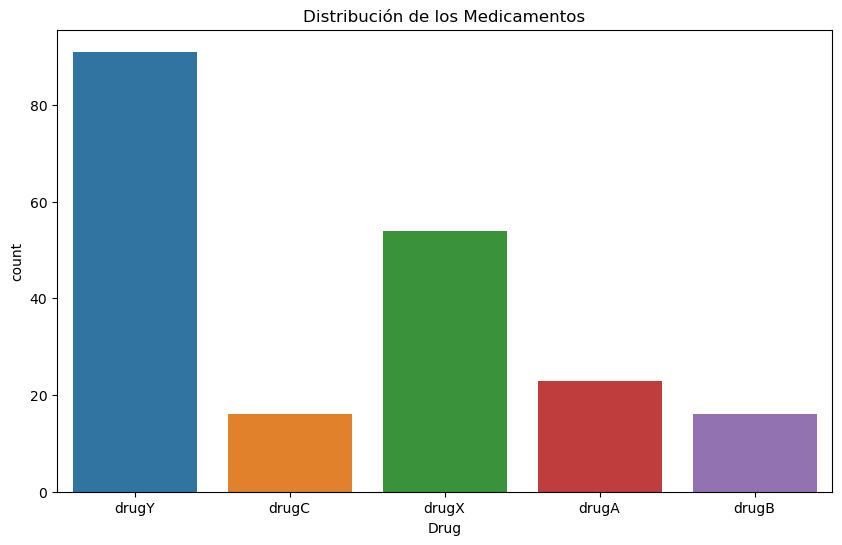

In [112]:
# Visualmente aí es como se ve la distribución de nuestros datos
plt.figure(figsize=(10, 6))
sns.countplot(x='Drug', data=data)
plt.title('Distribución de los Medicamentos')
plt.show()

In [113]:
# Ahora si pasamos a lo que nos corresponde y como primer paso hacemos el preprocesamiento de datos
# Comenzamos por convertir variables categóricas a numéricas
label_encoder = LabelEncoder()
# Al igual que en la tarea anterior, las medicamentos los dejaremos como variables cualitativas
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['BP'] = label_encoder.fit_transform(data['BP'])
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])

In [114]:
# Definimos nuestras variables 
feature_cols = ["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]
X = data[feature_cols]
y = data.Drug

In [115]:
# Ahora creamos los grupos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## Random Forest 

In [116]:
# A partir de aqui llamamos al Random Forest 
rf = RandomForestClassifier(n_estimators=100, random_state = 42)
rf.fit(X_train, y_train) # Aquí creo el modelo

RandomForestClassifier(random_state=42)

In [117]:
# Score F1 para el grupo de entrenamiento (training)
rf.score(X_train, y_train)

1.0

In [118]:
# Score F1 para el grupo de prueba (testing)
rf.score(X_test, y_test)

1.0

Como vemos es un resultyado perfecto y lo comprobamos con la estadistica de desempeño General

In [119]:
# Estadística de desempeño Gerneral
y_pred_rf = rf.predict (X_test) #Entrenamiento del modelo
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [120]:
# Planteamos nuestros datos para la gráfica

def plot_feature_importance(data, model):
    n_features = feature_cols #Definimos las caracteristicas
    plt.barh(n_features, model.feature_importances_, align="center") #definimos el tipo de gráfico y las importancias del modelo
    plt.xlabel("Importancia de las variables") #Colocamos las etiquetas para los ejes
    plt.ylabel("Características")
    plt.show()

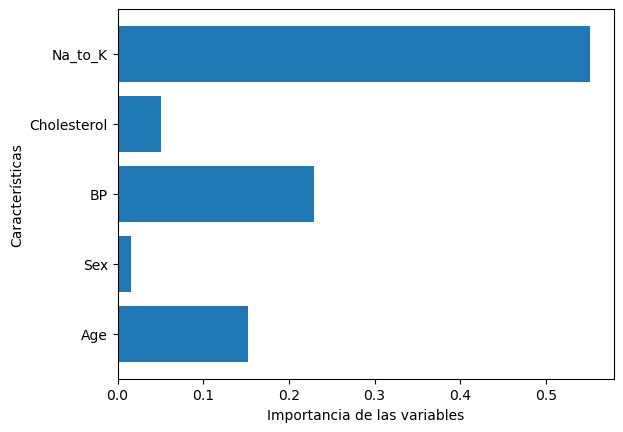

In [121]:
plot_feature_importance(data, rf) #La funcion esta definida arriba y esta es para que la muestre
# cada variable da un peso para predecir los resultados

Podemos ver que la variable Na_to_K tiene mucho peso para tener esta predicción

## Gradient Boosting

In [122]:
# Creamos el siguiente modelo Geibent Boosting Classifier
gbt = GradientBoostingClassifier(n_estimators=100, random_state=42) # 100 árboles de profundidad de 3 (Default)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [123]:
# Score F1 para el grupo de entrenamiento (training)
gbt.score(X_train, y_train)

1.0

In [124]:
# Score F1 para el grupo de prueba (testing)
gbt.score(X_test, y_test)

1.0

In [126]:
# Estadística de desempeño Gerneral
y_pred_gbt = gbt.predict (X_test) #Entrenamiento del modelo
print(classification_report(y_test, y_pred_gbt))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Desde que obtuvimos el grupo de prueba nos dimos cuenta que este modelo tambien nos da un resultado perfecto y tambien lo vemos a detalle con las estadísticas de desempeño

In [127]:
# Planteamos nuestros datos para la gráfica
def plot_feature_importance(data, model):
    n_features = feature_cols #Definimos las caracteristicas
    plt.barh(n_features, model.feature_importances_, align="center") #definimos el tipo de gráfico y las importancias del modelo
    plt.xlabel("Importancia de las variables") #Colocamos las etiquetas para los ejes
    plt.ylabel("Características")
    plt.show()

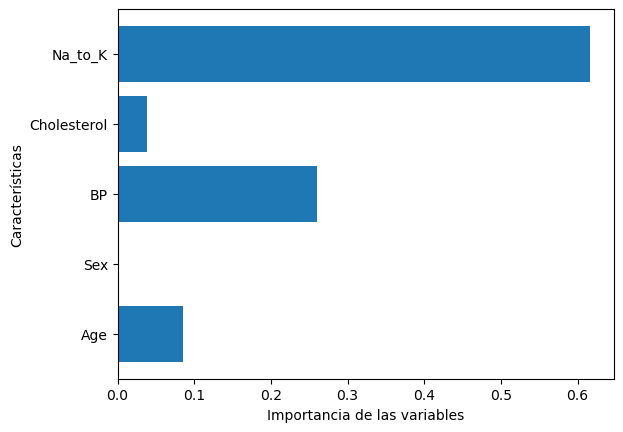

In [128]:
plot_feature_importance(data, gbt) #La funcion esta definida arriba y esta es para que la muestre
# cada variable da un peso para predecir los resultados

A pesar de que la grafica tambien nos da un 100% de confiabilidad podemos observar que a diferencia del modelo anterior, en este modelo el sexo del paciente no es importante 

## AdaBoost Classifier

In [129]:
# AdaBoost usa árboles de decisión como clasificador por Default
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1) #Creamos nuestro objeto de clasificación
model = abc.fit(X_train, y_train)

In [130]:
# Estadística de desempeño Gerneral
y_pred_abc = model.predict (X_test) #Entrenamiento del modelo
print(classification_report(y_test, y_pred_abc))

              precision    recall  f1-score   support

       drugA       0.70      1.00      0.82         7
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         6
       drugX       0.75      1.00      0.86        18
       drugY       1.00      1.00      1.00        26

    accuracy                           0.85        60
   macro avg       0.49      0.60      0.54        60
weighted avg       0.74      0.85      0.79        60



En este caso nuestro modelo bajo, pues solo acierta en el 85% de los casos, lo que es bueno, pero no como mis otros dos modelos; y por lo que vemos en el macro AVG tenemos una precisión del 49, pero un recall de 60, lo que indica que el rendimiento no es equilibrado entre clase; y el otro indicador de Weighted Avg que pondera las métricas según la cantidad de datos en cada clase refleja un rendimiento más realista, y solo para el suministro del medicamento Y podemos tener la confianza al 100% de suministrar este medicamento

In [131]:
# Planteamos nuestros datos para la gráfica
def plot_feature_importance(data, model):
    n_features = feature_cols #Definimos las caracteristicas
    plt.barh(n_features, model.feature_importances_, align="center") #definimos el tipo de gráfico y las importancias del modelo
    plt.xlabel("Importancia de las variables") #Colocamos las etiquetas para los ejes
    plt.ylabel("Características")
    plt.show()

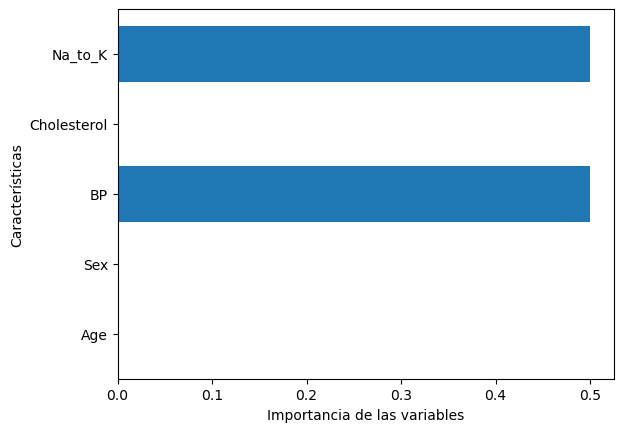

In [132]:
plot_feature_importance(data, abc) #La funcion esta definida arriba y esta es para que la muestre
# cada variable da un peso para predecir los resultados

Al imprimir la grafica para ver la pondetación que se les da a las caracteriscicas vemos que solo estamos tomando en cuenta Na to K y BP, quiza por eso es que no tenemos tanta confiabilidad

## Bagging Classifier
Este tipo de clasificación se mencionó en la clase, pero no fue desarrollada en la practica, de cualquier forma se anexa en esta practica

In [141]:
# Este solo lo creamos como base para después tomar como base el árbol de decisión
bagging_model = BaggingClassifier(n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

In [142]:
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [143]:
# Creamos el siguiente modelo Geibent Boosting Classifier
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42) # Tomo como base el árbol de decisiónm variable que se agrega para esta prueba
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [144]:
# Score F1 para el grupo de entrenamiento (training)
bag.score(X_train, y_train)

1.0

In [145]:
# Score F1 para el grupo de prueba (testing)
bag.score(X_test, y_test)

1.0

In [146]:
# Estadística de desempeño Gerneral
y_pred_bag = bag.predict (X_test) #Entrenamiento del modelo
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Y cómo podemos ver, tenemos una certeza para poder suministrar cualquier medicamento que predizcamos con este modelo, ya que tambien nos da el 100% de confiabilidad
En este ultimo ejercisio integre como base el arbol de decisión y en ambos tenemos un resultado optimo

# Observaciones generales de comparación
Se evaluaron cuatro modelos de ensamble para predecir el medicamento adecuado para pacientes basándonos en características como la edad, sexo, presión arterial, nivel de colesterol y relación sodio-potasio. 
Los modelos que  analizamos fueron: Random Forest, Gradient Boosting, AdaBoost y Bagging Classif

* **Random Forest:** Este modelo nos muestra una exactitud perfecta (100%) en entrenamiento y prueba, también un excelente equilibrio entre precisión y recall para todas las clases de medicamentos y la variable más importante fue Na_to_K, seguida de Cholesterol y BP.
* **Gradient Boosting:** En este modelo, también logramos obtener un 100% de exactitud en ambos conjuntos, al igual que en Random Forest pero con menor importancia asignada al sexo del paciente y la caracteristica de Na_to_K fue nuevamente la característica más determinante.
* **AdaBoost:** Este ,pdelo fue el unico en el que no obtuvimos el 100 %, pués su exactitud es del 85% en el conjunto de prueba, con rendimiento desigual entre clases (macro avg: precisión 49%, recall 60%), y por su parte solo predijo correctamente los medicamentos Y y X, con problemas en las demás clases y otro dato a resaltar es que este modelo se enfocó excesivamente  en Na_to_K y BP, ignorando otras características
* **Bagging Classifier:** Al igual que en los primeros dos modelos el rendimiento es perfecto (100%) en todas las métricas, lo hicimos usando como base los árboles de decisión y tambien sin esta baseobteniendo el mismo resultado en ambos 

**En conclusión**, este análisis demuestra que los métodos de ensamble, particularmente Random Forest, Gradient Boosting y Bagging, son altamente efectivos para la tarea de clasificación de medicamentos basada en características clínicas, superando significativamente al enfoque AdaBoost en este caso específico.

## ¿Mejoró su poder predictivo al comparar sus resultados con los obtenidos mediante el árbol de decisión aplicado en la actividad del módulo previo? 
Con los modelos de los árboles obtuvimos 2 modelos con una confiabilidad general del 90% y dos con el 100% de confiabilidad, en promedio tenemos una confiabilidad de 95% y en estos modelos en tres de ellos tenemos la confiabilidad de la predicción en un 100% pero uno de ellos que es el de AdaBoost tenemos una confiabilidad del 85%, en general nos baja el promedio a 96%, e igual por número de modelos tenemos una confiabilidad en el pronostico del 100% de 3 de 4 de nuestros modelos, así que con base a esa explicación podemos afirmar que mejoró el poder predictivo comparado a la lección anterior de los árboles de decisión.